## Unit 7 | Assignment - Distinguishing Sentiments

### Melvin Garcia

In [10]:
# Import Dependencies
import json
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tweepy
import apikeys

In [11]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [12]:
# Twitter API Keys
consumer_key = apikeys.D_TWITTER_CONSUMER_KEY
consumer_secret = apikeys.D_TWITTER_CONSUMER_SECRET
access_token = apikeys.D_TWITTER_ACCESS_TOKEN
access_token_secret = apikeys.D_TWITTER_ACCESS_TOKEN_SECRET

# Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [13]:
news_handles = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']

sentiments = []

for target_user in news_handles:
    
    count = 1
    
    for x in range(5):

        public_tweets = api.user_timeline(target_user, page=x)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            scores = analyzer.polarity_scores(tweet['text'])
            compound = scores['compound']
            pos = scores['pos']
            neu = scores['neu']
            neg = scores['neg']

            # Add sentiments for each tweet into `sentiments` list
            sentiments.append({'News_Outlet': target_user,
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets_Ago": count})
            count += 1

In [14]:
# Create sentiments df from constructed sentiments dict

sentiments_df = pd.DataFrame(sentiments)

# Peek at data
sentiments_df.head()

,Compound,Date,Negative,Neutral,News_Outlet,Positive,Tweets_Ago
0,-0.4404,Sun Dec 10 22:39:35 +0000 2017,0.734,0.266,@BBCNews,0.000,1
1,0.0000,Sun Dec 10 19:44:08 +0000 2017,1.000,0.000,@BBCNews,0.000,2
2,0.4215,Sun Dec 10 18:43:18 +0000 2017,0.641,0.000,@BBCNews,0.359,3
3,0.7574,Sun Dec 10 18:31:52 +0000 2017,0.727,0.000,@BBCNews,0.273,4
4,0.0000,Sun Dec 10 18:19:46 +0000 2017,1.000,0.000,@BBCNews,0.000,5


In [15]:
# Assign colors per news outlet

news_colors = {'@BBCNews':'skyblue', '@CBSNews': 'green', '@CNN': 'red', '@FoxNews': 'b', '@nytimes': 'gold'}


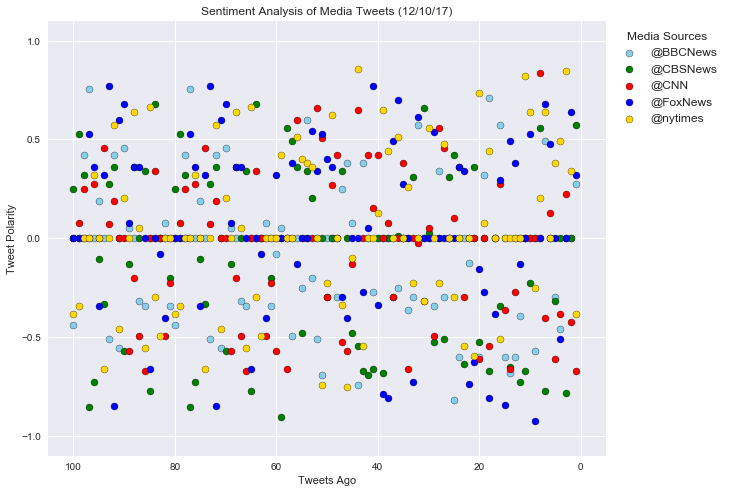

In [16]:
# Create scatter plot on listed news media tweets

news_handles = ['@BBCNews', '@CBSNews', '@CNN', '@FoxNews', '@nytimes']

plt.figure(figsize=(10,8))

for news in news_handles:
    news_df = sentiments_df.loc[(sentiments_df['News_Outlet'] == news)]
    plt.scatter(news_df['Tweets_Ago'].sort_values(ascending=False),
               news_df['Compound'], 
               color = news_colors[news], edgecolor = 'black',
               label = news)

plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Polarity')
plt.title('Sentiment Analysis of Media Tweets (12/10/17)')


plt.xlim([105, -5])
plt.ylim([-1.1, 1.1])
plt.yticks(np.arange(-1, 1.5, 0.5))
plt.xticks(np.arange(0, 120, 20))


plt.legend(loc='upper left', fontsize=12, bbox_to_anchor=(1,1), title='Media Sources')

plt.savefig('Sentiment Analysis of Media Tweets.png')

plt.show()

In [17]:
# Look at mean compound score from tweets of each news handle
sentiments_df.groupby('News_Outlet')['Compound'].mean()

News_Outlet
@BBCNews   -0.063529
@CBSNews   -0.083846
@CNN       -0.042200
@FoxNews    0.051475
@nytimes    0.046550
Name: Compound, dtype: float64

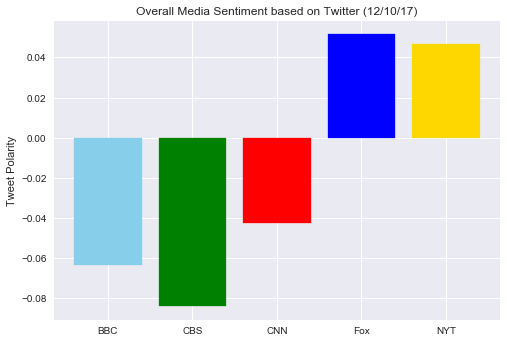

In [18]:
# Create bar plot visualizing overall sentiment

agg_news_mean = sentiments_df.groupby('News_Outlet')['Compound'].mean()
news_label = ['BBC', 'CBS', 'CNN', 'Fox', 'NYT']
x_values = np.arange(len(news_label))

news_senti = plt.bar(x_values, agg_news_mean, tick_label=news_label)

ind = 0
for news in news_handles:
    news_senti[ind].set_color(news_colors[news])
    ind+=1

plt.title("Overall Media Sentiment based on Twitter (12/10/17)")
plt.ylabel("Tweet Polarity")

plt.savefig('Overall Media Sentiment based on Twitter.png')

plt.show()

## Observable Trends

### - The Fox News twitter has the highest compound score. After looking briefly at the twitter handle's tweets, this may be due to the praise Fox news has for the presidents decision on Jerusalem. NY Times also has a high compound score. This may be due to the variety of content nytimes tweets out--movies, health, celebrity news...with more positive spins.
### - For about 60 tweets ago, and for all news outlets, there appears to be a slight dip in tweets, towards a compound score of 0. Dating these tweets, they appear to be around late November during the Thanksgiving holiday, possibly meaning less tweets during that time.
### - CBS tweets has the most negative compound score, which may be attributed to extensive coverage over the fire devastation in Southern California. 
